# Python for PoF - Workshop Series - Part 1.3

Vamsi Spandan

Dennis Bakhuis

**Reference Material** : 
* Effective Computation in Physics, Anthony Scopatz, Kathryn Huff, O'Reilly Media.
* Python for Scientists, John Stewart, Cambridge.

## Why Numpy

In [ ]:
def func_py(N):
    x = 0.0
    for i in range(N):
        x += (x%2 - 1)*i
    return x

In [ ]:
%timeit func_py(10000)

Same function can easily be implemented in Fortran or C

In [ ]:
# %install_ext https://raw.github.com/mgaitan/fortran_magic/master/fortranmagic.py

# conda install -c conda-forge fortran-magic=0.7


In [ ]:
%load_ext fortranmagic

In [ ]:
%%fortran
subroutine func_fort(n,d)
    integer, intent(in) :: n
    double precision, intent(out) :: d
    integer :: i
    d = 0
    do i = 0, n-1
        d = d + (mod(i,3)-1)*i
    end do
end subroutine func_fort

In [ ]:
%timeit func_fort(10000)

## 1. NumPy

NumPy gets us best of both worlds !

Many useful functions are not in the Python built in library, but are in external
scientific packages. These need to be imported into your Python notebook (or program) before
they can be used. Probably the most important of these are numpy and matplotlib.

Numpy is the bread of scientific computing. It can offer performance close to that of compiled languages but with the ease of the Python language. 

If `a` and `b` are two Python lists of the the same size and you want to multiply them element-wise. 

*Using Lists*
```
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])
```
*Using C*
``` 
for(i=0; i<rows; i++) {
    c[i]=a[i]*b[i]:
}
```

*Using Numpy*
```
c = a*b
```

In [ ]:
# Many useful functions are in external packages
# Let's meet numpy
import numpy as np

In [ ]:
# Tab completion to see what is available


In [ ]:
# This function looks for the string the in docstrings of all 
# numpy functions
np.lookfor('cosine')

In [ ]:
# To see what's in a package, type the name, a period, then hit tab
#np?
np.arange?

In [ ]:
# Some examples of numpy functions and "things"
print(np.sqrt(4))
print(np.pi)  # Not a function, just a variable
print(np.sin(np.pi))

###  Numpy arrays (ndarrays)
Numpy arrays are collections of things, all of which must be the same type, that work similarly to lists (but not exactly). The most important are:

1. You can easily perform elementwise operations (and matrix algebra) on arrays
1. Arrays can be n-dimensional
1. There is no equivalent to append, although arrays can be concatenated

Arrays can be created from existing collections such as lists, or instantiated "from scratch" in a 
few useful ways.

When getting started with scientific Python, you will probably want to try to use ndarrays whenever
possible, saving the other types of collections for those cases when you have a specific reason to use
them.

In [ ]:
# We need to import the numpy library to have access to it 
# We can also create an alias for a library, this is something you will commonly see with numpy
import numpy as np

# Make an array from a list
alist = [2, 3, 4]
blist = [5, 6, 7]
a = np.array(alist)
b = np.array(blist)
print(a, type(a))
print(b, type(b))

In [ ]:
# Do arithmetic on arrays
print(a**2)
print(np.sin(a))
print(a * b)
print(a.dot(b), np.dot(a, b))

In [ ]:
# Boolean operators work on arrays too, and they return boolean arrays
print(a > 2)
print(b == 6)

c = a > 2
print(c)
print(type(c))
print(c.dtype)

In [ ]:
# There are handy ways to make arrays full of ones and zeros
print(np.zeros(5))
print ('\n')
print(np.ones(5), '\n')
print(np.identity(5), '\n')

In [ ]:
# You can also easily make arrays of number sequences
print(np.arange(0, 10, 2))

print(np.linspace(0,10,num=5))

**Masking**


In [ ]:
a = np.array([1,3,4,5,6,7,8])
print(a[a>4])

In [ ]:
a = np.array([1,2,3,4])
my_mask = np.array([False,True,True,False])

a[my_mask]

**Numpy for Matlab users**

https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

http://mathesaurus.sourceforge.net/matlab-numpy.html

In [ ]:
# Arithmetic element-wise operations on arrays of same size
a = np.linspace(0,1,5)
b = np.linspace(1,3,5)

print(a+b)
print(a*b)
print(a/b)

**Vectorized code executes faster**

In [ ]:
# Smooth data by three-point averaging
f = np.sin(np.linspace(0,1,1000000))
f_av = f.copy()
f_av[1:-1]=(f[:-2]+f[1:-1]+f[2:])/3.0

%timeit

**Get rid of simple python loops in your code**
https://www.youtube.com/watch?v=EEUXKG97YRw

Some strategies

*__1.Use ufuncs (universal functions)__*

They operate element wise on arrays

In [ ]:
a = [1,2,3,4,5,6]
b = [val + 5 for val in a]
print (b)

In [ ]:
a = np.array(a)
b = a + 5
print(b)

In [ ]:
a = list(range(100000))
%timeit [val+5 for val in a]

In [ ]:
a = np.array(a)
%timeit a+5

There are many ufuncs available. 
- Arithmetic
- Bitwise operators
- Comparison operators
- Trignometry family : np.sin, np.cos
- Exponential family : np.exp, np.log, 
- Special functions  : scipy.special.* [Bessel functions, Gamma functions]

**__2.Numpy aggregations__**

They summarise the information on arrays. Such as minimum, maximum, mean etc. 

In [ ]:
print(a.max(), a.min(), a.mean(), a.std())

In [ ]:
M = np.random.randint(0,10,(3,5))
M

In [ ]:
M.sum()

In [ ]:
M.sum(axis=0) # sum of columns in the array

In [ ]:
M.sum(axis=1) # sum of rows in the array

** Numpy text output and input **

In [ ]:
len = 21
x = np.linspace(0,2*np.pi,len)
c = np.cos(x)
s = np.sin(x)
t = np.tan(x)

arr = np.empty((4,len),dtype=float)
arr[0,:] = x
arr[1,:] = c
arr[2,:] = s
arr[3,:] = t

np.savetxt('x.txt',x)
np.savetxt('xcst.txt', (x,c,s,t))
np.savetxt('xarr.txt',arr)

In [ ]:
xc = np.loadtxt('x.txt')
xc,cc,sc,tc = np.loadtxt('xcst.txt')
arrc = np.loadtxt('xarr.txt')

Writing and reading binary files is faster and produce more compact files because conversion to and from text is not needed. However, they cannot be read by humans. 

Numpy has its own binary format which guarantees paltform independence. You can save single arrays and also multiple arrays of different shapes

You can also load data from other programs (*.mat) (*.hdf5) etc.

In [ ]:
# For a single vector or array
np.save('array.npy',arr)

arrc = np.load('array.npy')

In [ ]:
# For different arrays - use a zipped binary archive
np.savez('test.npz', x=x, c=c, s=s, t=t)

# Recovering is a two step process
temp = np.load('test.npz')
xc = temp['x']
cc = temp['c']
sc = temp['s']
tc = temp['t']

## 2. Graphics

>The purpose of computing is insight, not just numbers - Richard Hamming

Welcome Matplotlib !

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the bottom-up to serve dual-purposes. First, to allow for interactive, cross-platform control of figures and plots, and second, to make it very easy to produce static raster or vector graphics files without the need for any GUIs. Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

Many users of matplotlib are often faced with the question, "I want to make a plot that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query. This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make plots. Browse through the gallery, click on any figure that has pieces of what you want to see the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

In [1]:
# Some errors may be version and backend dependent

import matplotlib as mpl
print(mpl.__version__)
print(mpl.get_backend())

1.5.1
MacOSX


In [2]:
#matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt #Importing pyplot branch of matplotlib as plt

<img src="images/figure_axes_axis_labeled.png" style="width: 400px;"/>

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  


**Now let's create a figure** ...

In [16]:
fig1 = plt.figure(1, figsize=(4,4))
#fig1 = plt.figure(figsize=plt.figaspect(2.0)) 

#ax = fig1.add_subplot(111) # Basically, 1 row and 1 column.
#ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')

Nothing happened! This is because by default mpl will not show anything until told to do so

In [10]:
plt.show()

You could also implement line 4 of the previous box through multiple lines
```
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')
```

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

** Basic Plotting **

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

(0.5, 4.5)

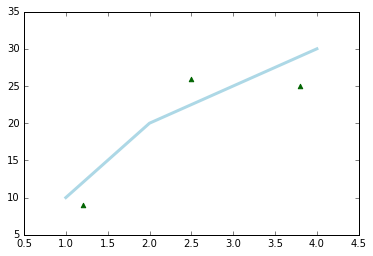

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
#plt.show()

You may find examples also like this

(0.5, 4.5)

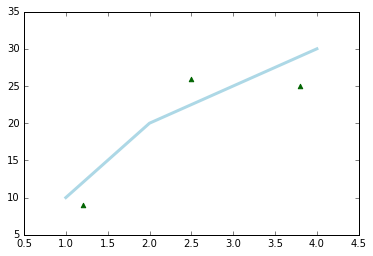

In [19]:

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
#plt.show()

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

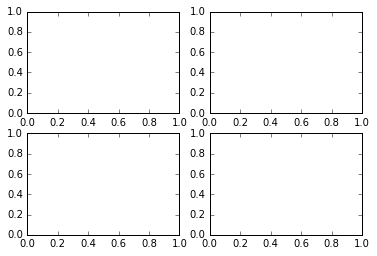

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

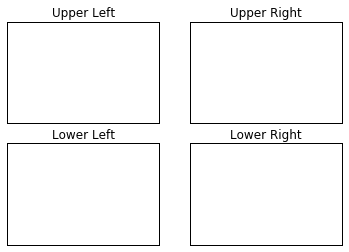

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

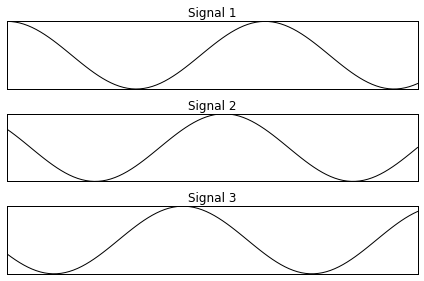

In [28]:
import numpy as np

x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

fig, axes = plt.subplots(nrows=3)

for ax, y, name in zip(axes, [y1, y2, y3], names):
    ax.plot(x, y, color='black')
    ax.set(xticks=[], yticks=[], title=name)

# fig.tight_layout()
plt.show()

What is a zip function
```
>>> x = [1, 2, 3]
>>> y = [4, 5, 6]
>>> zipped = zip(x, y)
>>> zipped
[(1, 4), (2, 5), (3, 6)]
>>> x2, y2 = zip(*zipped)
>>> x == list(x2) and y == list(y2)
True
```

### Animation

The most easy way to make an animation in matplotlib is to declare a FuncAnimation object that specifies to matplotlib what is the figure to update, what is the update function and what is the delay between frames.

((0, 1), [])

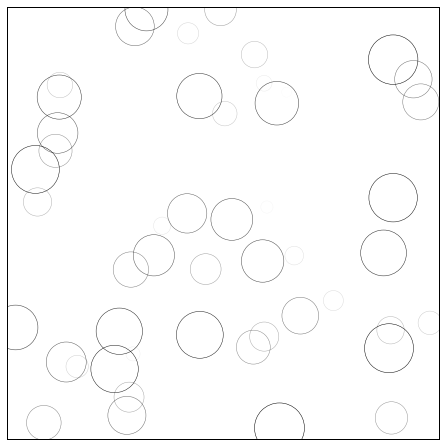

In [31]:
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


Now, we need to write the update function for our animation. At each time step, each ring should grow be more transparent while largest ring should be totally transparent and thus removed. Of course, we won't actually remove the largest ring but re-use it to set a new ring at a new random position, with nominal size and color. Hence, we keep the number of ring constant.

In [32]:
def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)

    # Return the modified object
    return scat,

Last step is to tell matplotlib to use this function as an update function for the animation and display the result or save it as a movie:

In [35]:
import matplotlib.animation as animation

anim = animation.FuncAnimation(fig, update, interval=10, blit=True, frames=200)
anim.save('rain.gif', writer='imagemagick', fps=30, dpi=40)
plt.show()

## You have a lot of control !!!

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

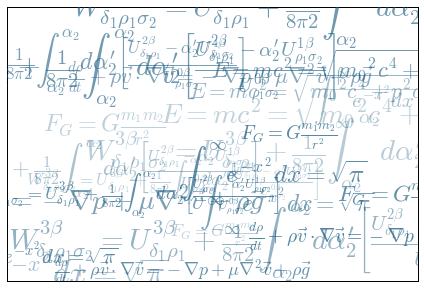

In [38]:
eqs = []
eqs.append((r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$"))
eqs.append((r"$\frac{d\rho}{d t} + \rho \vec{v}\cdot\nabla\vec{v} = -\nabla p + \mu\nabla^2 \vec{v} + \rho \vec{g}$"))
eqs.append((r"$\int_{-\infty}^\infty e^{-x^2}dx=\sqrt{\pi}$"))
eqs.append((r"$E = mc^2 = \sqrt{{m_0}^2c^4 + p^2c^2}$"))
eqs.append((r"$F_G = G\frac{m_1m_2}{r^2}$"))


plt.axes([0.025,0.025,0.95,0.95])

for i in range(24):
    index = np.random.randint(0,len(eqs))
    eq = eqs[index]
    size = np.random.uniform(12,32)
    x,y = np.random.uniform(0,1,2)
    alpha = np.random.uniform(0.25,.75)
    plt.text(x, y, eq, ha='center', va='center', color="#11557c", alpha=alpha,
             transform=plt.gca().transAxes, fontsize=size, clip_on=True)

plt.xticks([]), plt.yticks([])

### Mandelbrot Sets

You may have no professional interest in Mandelbrot sets, the discussion of their implementation raises a number of technical points that are more general, e.g.:

* performing operations hundreds of millions of times efficiently,
* removing points dynamically from multi-dimensional arrays,
* creating high-definition images pixel by pixel.


In [43]:
import numpy as np 
from time import time

# Set the parameters

max_iter=256                        # maximum number of iterations
nx, ny=1024, 1024                   # x- and y-image resolutions
x_lo, x_hi=-2.0,1.0                 # x bounds in complex plane
y_lo, y_hi=-1.5,1.5                 # y bounds in complex plane
start_time=time()

# Construct the two dimensional arrays

ix,iy=np.mgrid[0:nx,0:ny] 
x,y=np.mgrid[x_lo:x_hi:1j*nx,y_lo:y_hi:1j*ny]
c=x+1j*y
esc_parm=np.zeros((ny,nx,3),dtype='uint8') # holds pixel rgb data

# Flattened arrays
nxny=nx*ny
ix_f=np.reshape(ix,nxny)
iy_f=np.reshape(iy,nxny)
c_f=np.reshape(c,nxny)
z_f=c_f.copy()                      # the iterated variable

for iter in range(max_iter): # do the iterations
    if not len(z_f): # all points have escaped
        break
    # rgb values for this choice of iter
    n=iter+1
    r,g,b=n % 4 * 64,n % 8 * 32,n % 16 * 16

    # Mandelbrot evolution
    z_f*=z_f
    z_f+=c_f
    escape=np.abs(z_f) > 2.0 # points which are escaping
    # Set the rgb pixel value for the escaping points
    esc_parm[iy_f[escape],ix_f[escape],:]=r, g, b
    escape=~escape # points not escaping

    # Remove batch of newly escaped points from flattened arrays
    ix_f=ix_f[escape]
    iy_f=iy_f[escape]
    c_f=c_f[escape]
    z_f=z_f[escape]

print("Time taken = {0}".format(time()-start_time))

from PIL import Image

picture=Image.fromarray(esc_parm)
picture.show()
picture.save('mandelbrot.png')

Time taken = 1.5866191387176514
